In [8]:
import os

import numpy as np
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt
import pandas as pd
from toolsets.file_io import get_file_list, readin_peak_list
import toolsets.spectra_operations as so
from toolsets.std_list_prep import complete_smiles, complete_mono_mass, complete_formal_charge, guess_adduct, std_list_cleanup
from toolsets.ff_droup import process_mzml, get_EIC_list, EIC, feature_finding
from toolsets.search import string_search,quick_search_values
from tqdm import tqdm
from molmass import Formula
from toolsets.sirius_lite import mass_to_formula, check_chemistry, get_isotope, ms1_intensity_score, bin_ms1
from toolsets.spectra_plotter import ms2_plot, head_to_tail_plot
import seaborn as sns
import matplotlib.pyplot as plt
from toolsets.std_list_prep import calculate_precursormz
from toolsets.constants import single_charged_adduct_mass
mzml_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/T_rex_data'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
all_files = get_file_list(mzml_dir, '.mzML', with_tail=True)

In [12]:
all_files

['PoolQC01_MX612252_NegBA_postLongevity_Female013.mzML']

In [15]:
os.path.join(mzml_dir, all_files[0])

'/Users/fanzhoukong/Documents/GitHub/Libgen_data/T_rex_data/PoolQC01_MX612252_NegBA_postLongevity_Female013.mzML'

In [18]:
ms1, ms2 = process_mzml(os.path.join(mzml_dir, all_files[0]), rt_max=20)

In [31]:
pmz = 59.01330+single_charged_adduct_mass['[M-H]-']

In [34]:
pmz

58.006024000000004

In [32]:
rt_list, intensity_list = get_EIC_list(ms1, pmz, step=0.01)

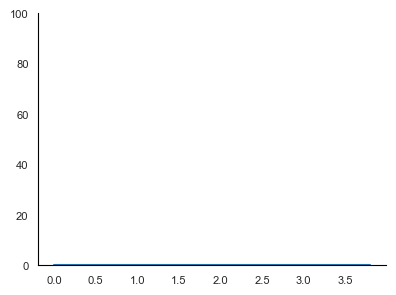

In [35]:
EIC(rt_list, intensity_list)